In [21]:
import numpy as np
import matplotlib.pyplot as plt








The `simulate_single_line_distribute` function simulates a line with N people

In [22]:
def simulate_single_line_distribute(number_counter, number_people, lower_bound_time, upper_bound_time):

    # Initializes the counters
    counter_array = np.zeros(number_counter)

    current_timestep = 0
    people_fullfilled = 0

    # Loop for the people still in line
    while people_fullfilled < number_people:

        # Checks every counter if any counter is available to be used
        counter_count = 0
        while counter_count < number_counter:

            # Condition for a free counter
            if counter_array[counter_count] == 0:

                # Time of transaction with the counter
                counter_array[counter_count] = np.random.randint(lower_bound_time,upper_bound_time)

            counter_count += 1

        # Gets the lowest transaction time and subtracts it to all counters
        # Essentially frees up the next counter on the next iteration
        minimum_time_value = np.min(counter_array)
        counter_array -= minimum_time_value

        # Updates the timestep
        current_timestep += minimum_time_value

        # Updates the number of people with complete transaction
        for element in counter_array:
            if element == 0:
                people_fullfilled += 1

    return current_timestep

In [23]:
number_simulations = 100000

time_list = []

for i in range(number_simulations):
    print(f"Current Count: {i+1}")
    time_list.append(simulate_single_line_distribute(25,100,10,180))

Current Count: 1
Current Count: 2
Current Count: 3
Current Count: 4
Current Count: 5
Current Count: 6
Current Count: 7
Current Count: 8
Current Count: 9
Current Count: 10
Current Count: 11
Current Count: 12
Current Count: 13
Current Count: 14
Current Count: 15
Current Count: 16
Current Count: 17
Current Count: 18
Current Count: 19
Current Count: 20
Current Count: 21
Current Count: 22
Current Count: 23
Current Count: 24
Current Count: 25
Current Count: 26
Current Count: 27
Current Count: 28
Current Count: 29
Current Count: 30
Current Count: 31
Current Count: 32
Current Count: 33
Current Count: 34
Current Count: 35
Current Count: 36
Current Count: 37
Current Count: 38
Current Count: 39
Current Count: 40
Current Count: 41
Current Count: 42
Current Count: 43
Current Count: 44
Current Count: 45
Current Count: 46
Current Count: 47
Current Count: 48
Current Count: 49
Current Count: 50
Current Count: 51
Current Count: 52
Current Count: 53
Current Count: 54
Current Count: 55
Current Count: 56
C

In [24]:
mean = np.mean(time_list)
print(mean)

std = np.std(time_list)
print(std)

411.26091
21.935015750436563


191.9107524956344
630.6110675043657
[191.9107525  197.39450643 202.87826037 208.36201431 213.84576825
 219.32952218 224.81327612 230.29703006 235.780784   241.26453793
 246.74829187 252.23204581 257.71579975 263.19955368 268.68330762
 274.16706156 279.6508155  285.13456943 290.61832337 296.10207731
 301.58583125 307.06958519 312.55333912 318.03709306 323.520847
 329.00460094 334.48835487 339.97210881 345.45586275 350.93961669
 356.42337062 361.90712456 367.3908785  372.87463244 378.35838637
 383.84214031 389.32589425 394.80964819 400.29340212 405.77715606
 411.26091    416.74466394 422.22841788 427.71217181 433.19592575
 438.67967969 444.16343363 449.64718756 455.1309415  460.61469544
 466.09844938 471.58220331 477.06595725 482.54971119 488.03346513
 493.51721906 499.000973   504.48472694 509.96848088 515.45223481
 520.93598875 526.41974269 531.90349663 537.38725057 542.8710045
 548.35475844 553.83851238 559.32226632 564.80602025 570.28977419
 575.77352813 581.25728207 586.741036   592

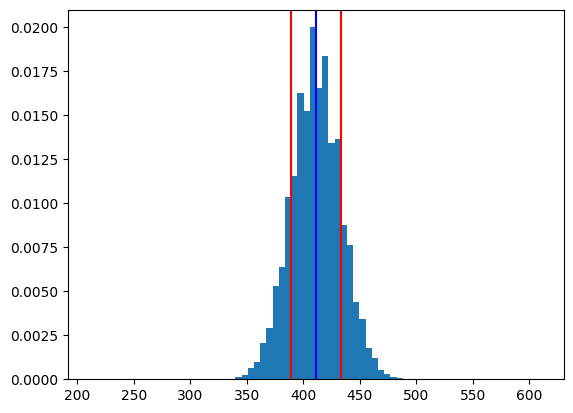

In [28]:
half_bins = 20

bin_width = std*0.25

lower_bound_bins = mean - (bin_width * half_bins * 2)
upper_bound_bins = mean + (bin_width * half_bins * 2)

print(lower_bound_bins)
print(upper_bound_bins)

bins = np.arange(lower_bound_bins,upper_bound_bins,bin_width)
print(bins)

print(len(bins))

plt.hist(time_list,bins=bins,density=True,)
plt.axvline(x = mean, color = 'b', label = 'axvline - full height')
plt.axvline(x = mean+std, color = 'r', label = 'axvline - full height')
plt.axvline(x = mean-std, color = 'r', label = 'axvline - full height')
plt.xlim(lower_bound_bins,upper_bound_bins)
plt.show()
plt.close()